In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style ='darkgrid', font_scale=1.5)
plt.rcParams['font.sans-serif'] =['SimHei']
plt.rcParams['axes.unicode_minus'] =False


# 1、数据查看

In [3]:
data_user = pd.read_csv('tianchi_mobile_recommend_train_user.csv',dtype = str)

In [4]:
#如电脑比较弱（4G内存，cpu比较弱） 在这里选前100万条数据即可
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        object
 1   item_id        object
 2   behavior_type  object
 3   user_geohash   object
 4   item_category  object
 5   time           object
dtypes: object(6)
memory usage: 561.1+ MB


In [5]:
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21


# 2 数据预处理

In [6]:
#2.1 缺失值分析，apply默认对列进行操作，x代表一列
data_user.apply(lambda x: sum(x.isnull())/len(x))  # 只有地理位置列有缺失值


user_id          0.00000
item_id          0.00000
behavior_type    0.00000
user_geohash     0.68001
item_category    0.00000
time             0.00000
dtype: float64

In [8]:
data_user.apply(lambda x: sum(x.isnull()))

user_id                0
item_id                0
behavior_type          0
user_geohash     8334824
item_category          0
time                   0
dtype: int64

In [9]:
data_user.shape

(12256906, 6)

In [10]:
#把日期和小时分别取出来
data_user['date'] = data_user['time'].str[0:10]
data_user['hour'] = data_user['time'].str[11:]  #如果发生溢出就分开执行

In [11]:
data_user.dtypes

user_id          object
item_id          object
behavior_type    object
user_geohash     object
item_category    object
time             object
date             object
hour             object
dtype: object

In [12]:
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,98047837,232431562,1,NaN,4245,2014-12-06 02,2014-12-06,02
1,97726136,383583590,1,NaN,5894,2014-12-09 20,2014-12-09,20
2,98607707,64749712,1,NaN,2883,2014-12-18 11,2014-12-18,11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10,2014-12-06,10
4,98145908,290208520,1,NaN,13926,2014-12-16 21,2014-12-16,21


In [13]:
data_user['date'] = pd.to_datetime(data_user['date'])
data_user['time']= pd.to_datetime(data_user['time'])
data_user['hour'] = data_user['hour'].astype(int)

In [15]:
data_user.dtypes

user_id                  object
item_id                  object
behavior_type            object
user_geohash             object
item_category            object
time             datetime64[ns]
date             datetime64[ns]
hour                      int32
dtype: object

In [16]:
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,98047837,232431562,1,NaN,4245,2014-12-06 02:00:00,2014-12-06,2
1,97726136,383583590,1,NaN,5894,2014-12-09 20:00:00,2014-12-09,20
2,98607707,64749712,1,NaN,2883,2014-12-18 11:00:00,2014-12-18,11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10:00:00,2014-12-06,10
4,98145908,290208520,1,NaN,13926,2014-12-16 21:00:00,2014-12-16,21


In [17]:
#对数据进行一下排序
data_user.sort_values(by ='time',ascending=True,inplace = True)  # 升序

In [19]:
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
1505077,73462715,378485233,1,NaN,9130,2014-11-18,2014-11-18,0
8686537,36090137,236748115,1,NaN,10523,2014-11-18,2014-11-18,0
4035788,40459733,155218177,1,NaN,8561,2014-11-18,2014-11-18,0
10113411,814199,149808524,1,NaN,9053,2014-11-18,2014-11-18,0
2936757,113309982,5730861,1,NaN,3783,2014-11-18,2014-11-18,0


In [20]:
data_user.tail()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
5241608,132653097,119946062,2,NaN,6054,2014-12-18 23:00:00,2014-12-18,23
10296029,130082553,296196819,1,NaN,11532,2014-12-18 23:00:00,2014-12-18,23
8527264,43592945,350594832,1,9rhhgph,9541,2014-12-18 23:00:00,2014-12-18,23
6263497,12833799,186993938,1,954g37v,3798,2014-12-18 23:00:00,2014-12-18,23
9200479,77522552,69292191,1,NaN,889,2014-12-18 23:00:00,2014-12-18,23


In [21]:
#丢弃原有索引，按位置重新生成索引，在原有df生效
data_user.reset_index(drop =True,inplace =True)

In [22]:
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,73462715,378485233,1,NaN,9130,2014-11-18,2014-11-18,0
1,36090137,236748115,1,NaN,10523,2014-11-18,2014-11-18,0
2,40459733,155218177,1,NaN,8561,2014-11-18,2014-11-18,0
3,814199,149808524,1,NaN,9053,2014-11-18,2014-11-18,0
4,113309982,5730861,1,NaN,3783,2014-11-18,2014-11-18,0


In [23]:
# top是出现最多次数的那个str值，freq是top内的值出现的次数
data_user.describe(include = ['object'])  #第二行可以看出行为类型，用户位置类别，商品品类

,user_id,item_id,behavior_type,user_geohash,item_category
count,12256906,12256906,12256906,3922082,12256906
unique,10000,2876947,4,575458,8916
top,36233277,112921337,1,94ek6ke,1863
freq,31030,1445,11550581,1052,393247


In [25]:
data_user[data_user['user_geohash']=='94ek6ke']

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
126002,36233277,47069893,1,94ek6ke,1121,2014-11-18 13:00:00,2014-11-18,13
126409,36233277,98158383,1,94ek6ke,1121,2014-11-18 13:00:00,2014-11-18,13
126582,36233277,142300149,1,94ek6ke,1121,2014-11-18 13:00:00,2014-11-18,13
126955,36233277,161989622,1,94ek6ke,1121,2014-11-18 13:00:00,2014-11-18,13
262221,36233277,350861457,1,94ek6ke,1121,2014-11-18 20:00:00,2014-11-18,20
...,...,...,...,...,...,...,...,...
12132749,36233277,224972503,3,94ek6ke,1863,2014-12-18 19:00:00,2014-12-18,19
12243377,36233277,229099022,1,94ek6ke,8721,2014-12-18 23:00:00,2014-12-18,23
12243569,36233277,34128930,1,94ek6ke,9835,2014-12-18 23:00:00,2014-12-18,23
12243608,36233277,221625532,1,94ek6ke,1863,2014-12-18 23:00:00,2014-12-18,23


In [26]:
data_user.describe(include = 'all')

C:\Users\waitp\AppData\Local\Temp\ipykernel_11584\2449917830.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_user.describe(include = 'all')
C:\Users\waitp\AppData\Local\Temp\ipykernel_11584\2449917830.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_user.describe(include = 'all')


,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
count,12256906,12256906,12256906,3922082,12256906,12256906,12256906,1.225691e+07
unique,10000,2876947,4,575458,8916,744,31,NaN
top,36233277,112921337,1,94ek6ke,1863,2014-12-11 22:00:00,2014-12-12 00:00:00,NaN
freq,31030,1445,11550581,1052,393247,54797,691712,NaN
first,NaN,NaN,NaN,NaN,NaN,2014-11-18 00:00:00,2014-11-18 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,2014-12-18 23:00:00,2014-12-18 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.481799e+01
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.474778e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+01


# 构建模型

In [27]:
pv_daily = data_user.groupby('date').count()['user_id']

In [28]:
#得到了每天的pv（日活）
pv_daily.head()

date
2014-11-18    366701
2014-11-19    358823
2014-11-20    353429
2014-11-21    333104
2014-11-22    361355
Name: user_id, dtype: int64

In [29]:
#如果不小心把名字弄错了，不需要重新读取数据，直接改列名
#改为user_id1的目的是为了下面命名为pv,uv做准备
pv_daily = pv_daily.rename('user_id1') #注意这里一定要写赋值

In [30]:
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

In [63]:
data_user.groupby('date')['user_id'].head(10)

0            73462715
1            36090137
2            40459733
3              814199
4           113309982
5              814199
6              814199
7            79587494
8            71146691
9            71146691
366701       81506172
366702        1926899
366703       51204443
366704        4364079
366705       46274658
366706      120852545
366707       51204443
366708       69389641
366709      133240213
366710       18785289
725524       35427753
725525       73854016
725526       78314284
725527       74492481
725528       53916276
725529       10539406
725530       62068426
725531       17048049
725532       10164041
725533       73455580
1078953      74952849
1078954     139174569
1078955      33596774
1078956      85169785
1078957      97389266
1078958      48509295
1078959      75251738
1078960      11552428
1078961     139174569
1078962     119160278
1412057      97019627
1412058     131112654
1412059     134233776
1412060       2283337
1412061       7226947
1412062   

In [36]:
#如何计算uv，针对用户访问进行去重，再计算数目
uv_daily = data_user.groupby('date')['user_id'].apply(lambda x:x.drop_duplicates().count())


In [37]:
uv_daily.head()

date
2014-11-18    6343
2014-11-19    6420
2014-11-20    6333
2014-11-21    6276
2014-11-22    6187
Name: user_id, dtype: int64

In [38]:
pv_uv_daily = pd.concat([pv_daily, uv_daily],axis=1)


In [39]:
pv_uv_daily.head()

,user_id1,user_id
date,,
2014-11-18,366701,6343
2014-11-19,358823,6420
2014-11-20,353429,6333
2014-11-21,333104,6276
2014-11-22,361355,6187


In [40]:
pv_uv_daily.rename(columns={'user_id1':'pv','user_id':'uv'},inplace =True)


In [41]:
pv_uv_daily.head()

,pv,uv
date,,
2014-11-18,366701,6343
2014-11-19,358823,6420
2014-11-20,353429,6333
2014-11-21,333104,6276
2014-11-22,361355,6187


In [42]:
pv_uv_daily.head(5).to_csv('pv_uv.csv')

In [ ]:
# pv_uv_daily.head(5).to_excel('pv_uv.xls')

In [43]:
pv_uv_daily.corr(method = 'spearman')

,pv,uv
pv,1.000,0.825
uv,0.825,1.000


In [44]:
pv_uv_daily.corr(method = 'pearson')  #皮尔逊相关系数,到推荐那里讲

,pv,uv
pv,1.000000,0.920602
uv,0.920602,1.000000


In [ ]:
#上面说明每天的访问量和访问用户是正相关的关系

In [45]:
pv_daily.head(100)

date
2014-11-18    366701
2014-11-19    358823
2014-11-20    353429
2014-11-21    333104
2014-11-22    361355
2014-11-23    382702
2014-11-24    378342
2014-11-25    370239
2014-11-26    360896
2014-11-27    371384
2014-11-28    340638
2014-11-29    364697
2014-11-30    401620
2014-12-01    394611
2014-12-02    405216
2014-12-03    411606
2014-12-04    399952
2014-12-05    361878
2014-12-06    389610
2014-12-07    399751
2014-12-08    386667
2014-12-09    398025
2014-12-10    421910
2014-12-11    488508
2014-12-12    691712
2014-12-13    407160
2014-12-14    402541
2014-12-15    398356
2014-12-16    395085
2014-12-17    384791
2014-12-18    375597
Name: user_id1, dtype: int64

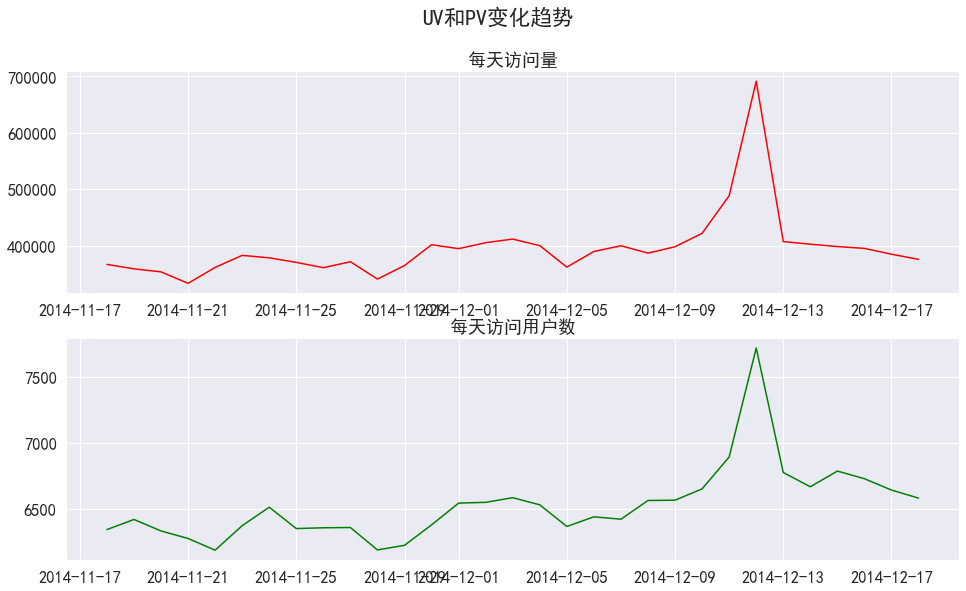

In [46]:
#默认显示一个月的区别
plt.figure(figsize=(16,9))
plt.subplot(211)  #等价于2,1,2，是2行1列图，这里是第一个图
plt.plot(pv_daily, color='red')  #pv_daily是一个series，
plt.title('每天访问量')
plt.subplot(212)
plt.plot(uv_daily,color='green')
plt.title('每天访问用户数')
plt.suptitle('UV和PV变化趋势')
plt.show()


In [ ]:
#结论：上面两幅图可以发现双12达到峰值

In [47]:
#小时的pv
pv_daily = data_user.groupby('hour').count()['user_id']

In [48]:
pv_daily.head(30)

hour
0      517404
1      267682
2      147090
3       98516
4       80487
5       88296
6      158798
7      287337
8      396106
9      485951
10     550665
11     526940
12     531957
13     598343
14     594215
15     598849
16     576207
17     505936
18     547383
19     735192
20     935161
21    1090178
22    1088961
23     849252
Name: user_id, dtype: int64

In [49]:
#小时的uv
uv_daily = data_user.groupby('hour')['user_id'].apply(lambda x:x.drop_duplicates().count())

In [50]:
uv_daily.head(30)

hour
0     5786
1     3780
2     2532
3     1937
4     1765
5     2030
6     3564
7     5722
8     7108
9     7734
10    8139
11    8239
12    8314
13    8352
14    8255
15    8257
16    8320
17    8228
18    8278
19    8538
20    8780
21    8866
22    8599
23    7484
Name: user_id, dtype: int64

In [51]:
pv_uv_daily = pd.concat([pv_daily, uv_daily],axis=1)

In [52]:
pv_uv_daily.columns=['pv','uv']

In [53]:
pv_uv_daily.head()

,pv,uv
hour,,
0,517404,5786
1,267682,3780
2,147090,2532
3,98516,1937
4,80487,1765


In [54]:
pv_uv_daily.corr(method = 'spearman')

,pv,uv
pv,1.000000,0.903478
uv,0.903478,1.000000


In [55]:
pv_uv_daily.corr(method = 'pearson')  #皮尔逊相关系数

,pv,uv
pv,1.000000,0.835305
uv,0.835305,1.000000


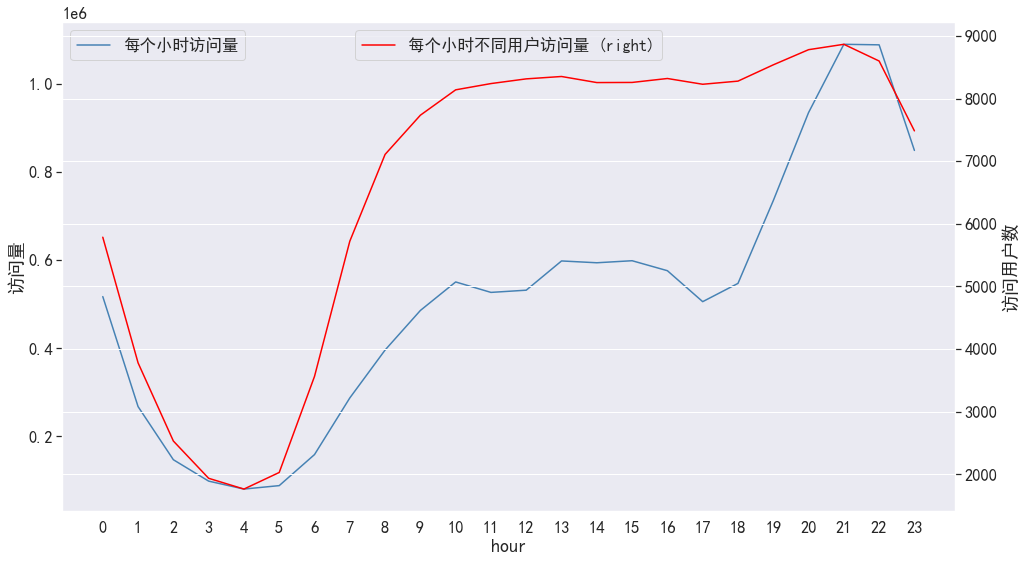

In [56]:
plt.figure(figsize=(16,9))
pv_uv_daily['pv'].plot(color= 'steelblue', label ='每个小时访问量')
plt.legend(loc ='upper center')
plt.ylabel('访问量')
pv_uv_daily['uv'].plot(color= 'red', label='每个小时不同用户访问量',secondary_y =True)
plt.ylabel('访问用户数')
plt.xticks(range(0,24),pv_uv_daily.index)
plt.legend(loc ='upper center')
plt.grid(True)
plt.show()


In [57]:
#先看下上面的数据
pv_detail = pd.pivot_table(columns ='behavior_type',index ='hour' , data = data_user,values = 'user_id',aggfunc=np.size)

In [58]:
pv_detail #点击、收藏、加入购物车和支付 的比例

behavior_type,1,2,3,4
hour,,,,
0,487341,11062,14156,4845
1,252991,6276,6712,1703
2,139139,3311,3834,806
3,93250,2282,2480,504
4,75832,2010,2248,397
5,83545,2062,2213,476
6,150356,3651,3768,1023
7,272470,5885,7044,1938
8,374701,7849,9970,3586
